# Introduction

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns. 
- UID: unique identifier ranging from 1 to 10000

- product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

- type: just the product type L, M or H from product ID column

- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

- rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

- torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

- machine failure iindicates whether the machine has failed (1) in this particular datapoint for any of the following failure modes are true.

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins.

- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. 

- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.

- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.

- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. 


This dataset is part of the following publication: S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.


# Importing Libraries

In [ ]:
#!pip install matplotlib --upgrade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
raw_data = pd.read_csv('ai4i2020.csv')

# Data Exploration 

In [5]:
raw_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Determine dataframe dimensions

In [6]:
raw_data.shape

(10000, 14)

Determine the unique values in each column, including the ID columns. This will help identify if there are duplicate values which may affect prediction. 

In [7]:
raw_data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

Since the UDI and Product ID have 10000 unique values, which is equivalent to the total number of rows or observations in the dataset, there are no duplicate values in the dataset. To further ensure that there are no duplicated values, their sum can be detemined. 

In [8]:
print(raw_data.duplicated().sum())

0


To begin the data preparation process, missing values need to be handled. Therefore, it is important to determine their sum.

In [9]:
raw_data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

To further ensure that there are no missing values, the dataframe can be searched for ? values which are missing values that are labeled with a question mark. These can be replaced with nan.

In [10]:
raw_data.replace("?",np.nan,inplace=True)
raw_data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

As seen, the sum of the missing values for all the columns is 0. Therefore, no imputations or row dropping are needed. Next, some statistics and relationships for the values in the dataframe can be determined.

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

It can be seen that the feature types for the dataframe enteries all numerical (float64 and int64) with the exception of the Product ID and Type. These two values along with the UDI will have no significance on the model as they are unique identifier or related to the unique identifiers for each machine. Therefore, the UDI, Product ID, and Type columns are dropped.

In [12]:
processed_data = raw_data.copy()

In [13]:
processed_data.drop(['UDI','Product ID','Type'],axis=1,inplace=True)

In [14]:
print(processed_data.columns)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


Now that the irrelevant features are dropped, it is important to check for skew within the data. To do that, the describe function is used.

In [15]:
processed_data.describe(include='all')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


It can be seen that the data lies closely to one another especially for Air temperature and Process temperature which perhaps points to a balanced distribution around the mean. This is indicated by their lower standard deviation when compared to rotational speed for example. The data balance can be further explored.

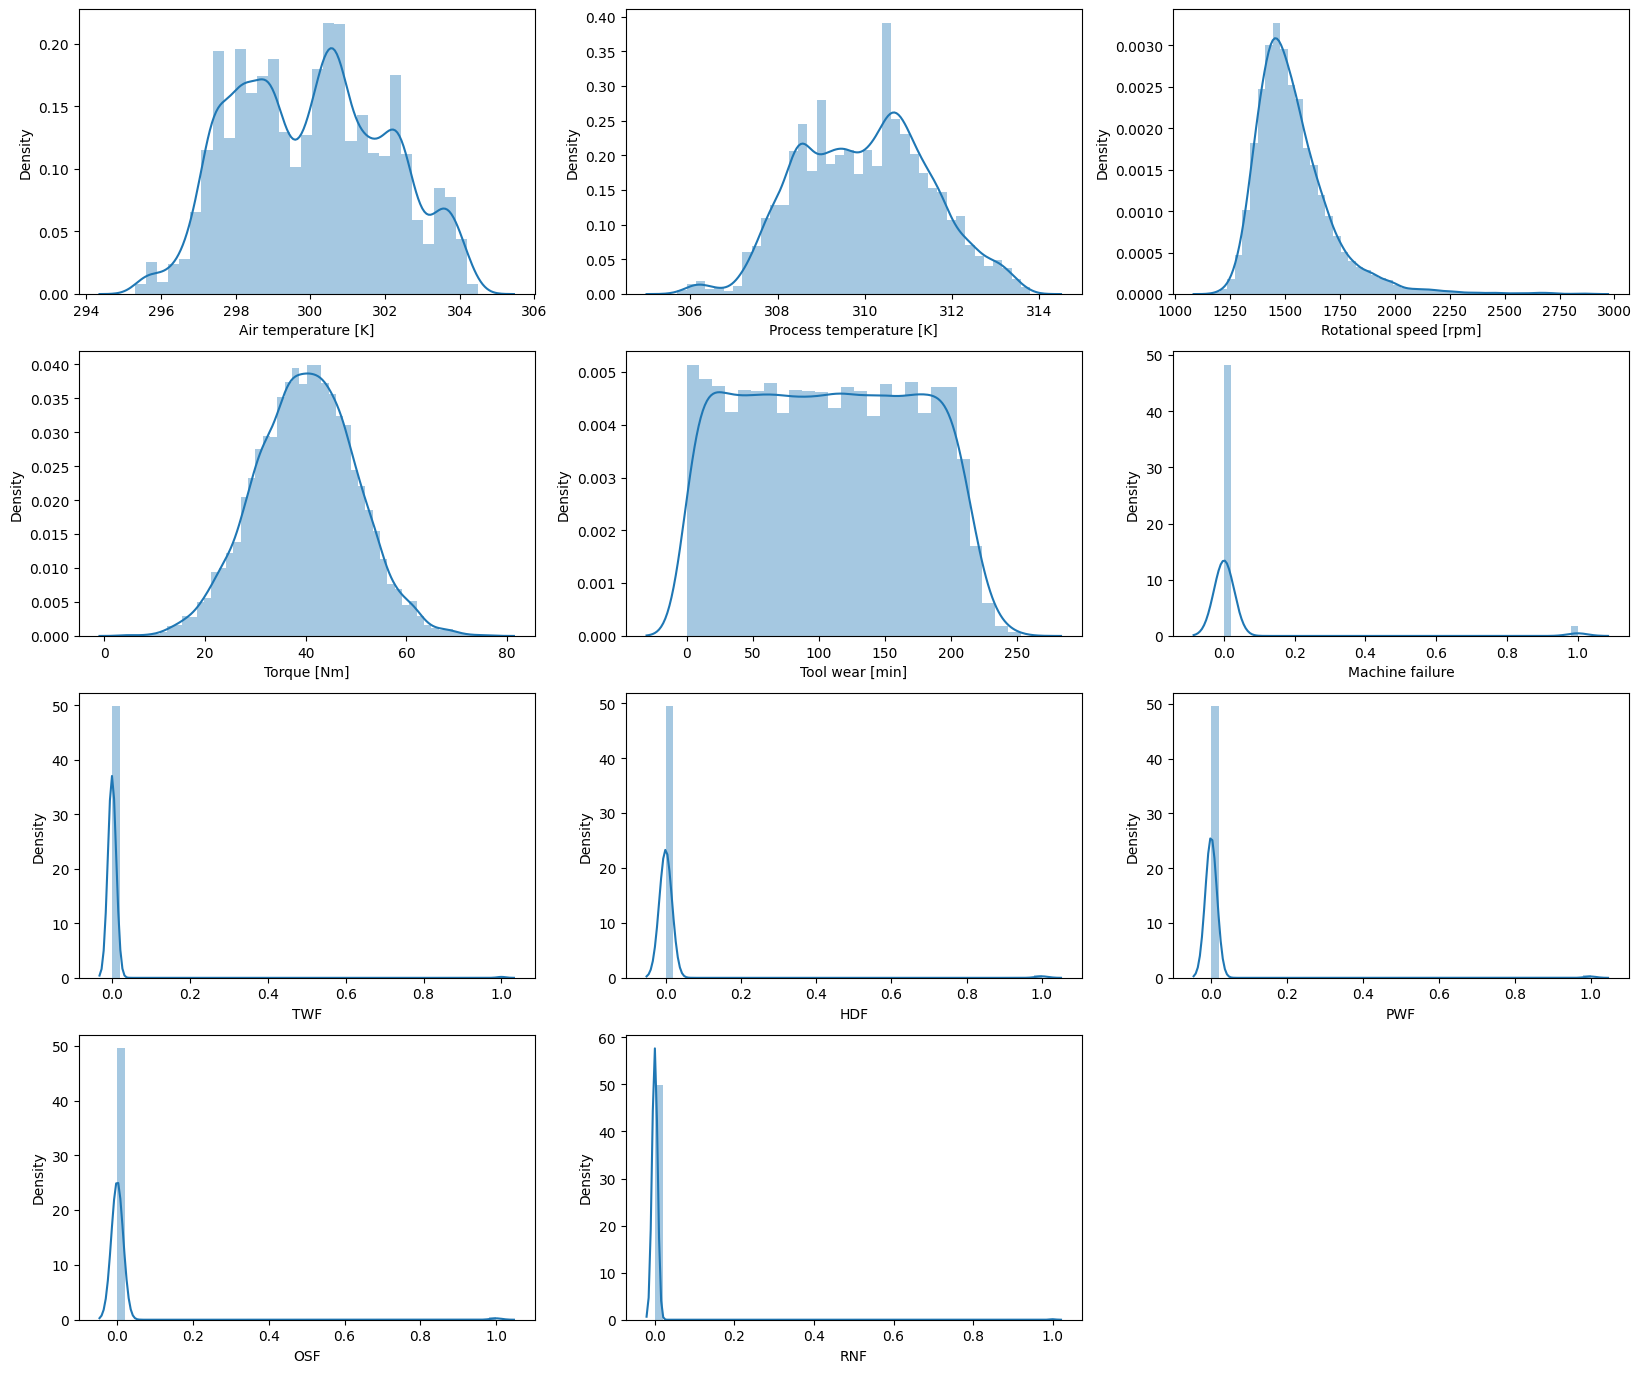

In [16]:
plt.figure(figsize=(20,40), dpi= 100)

for i, column in enumerate(processed_data.columns, 1):
    plt.subplot(9,3,i)
    sns.distplot(processed_data[column])

The above distribution curves depit continuous values for the features. It can be seen that the data is are normally distributed and there is no noticeable skewness. It is also evident that the machine failure is imbalanced. To better visualize the imbalance, let's look at a count plot.


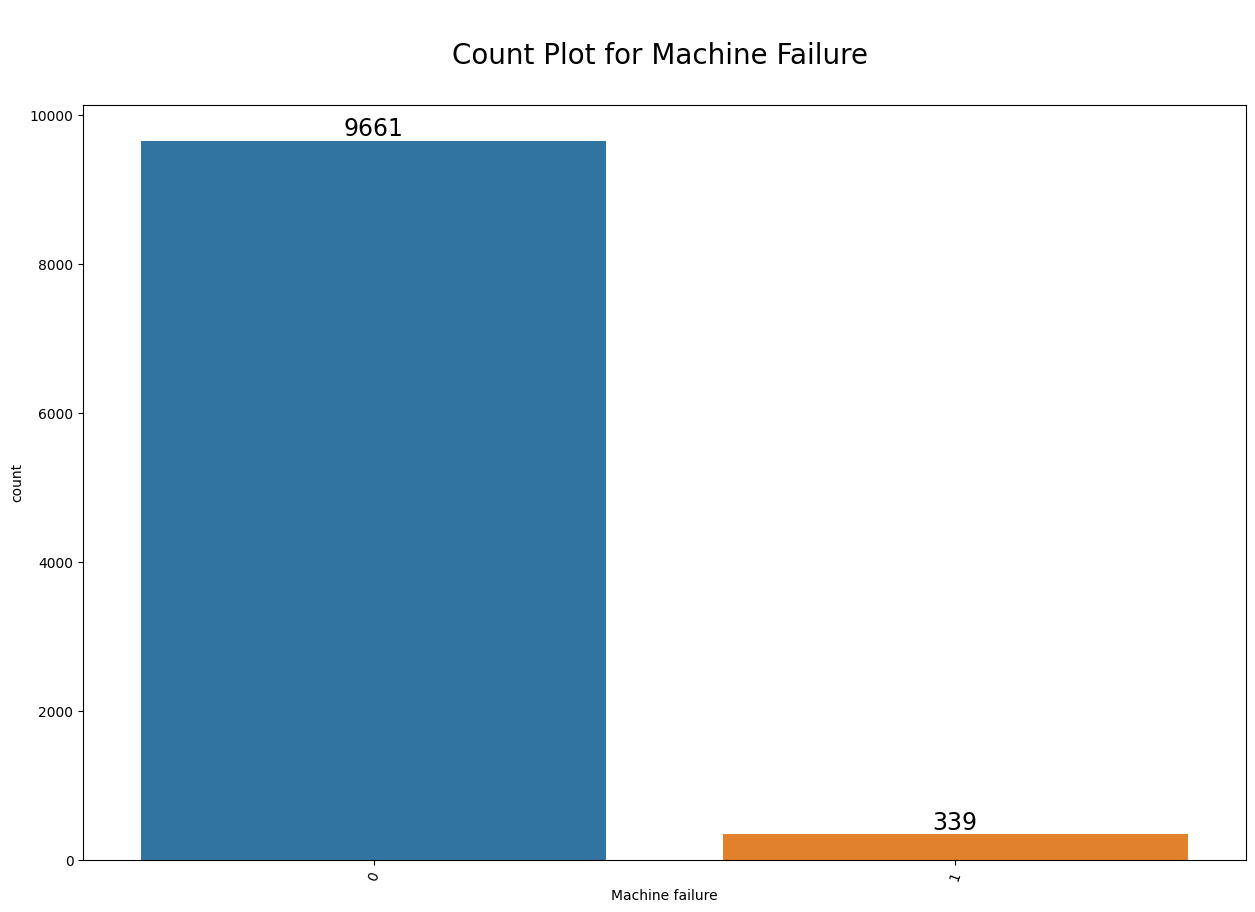

In [17]:
plt.figure(figsize=(15,10), dpi= 100)

ax = sns.countplot(processed_data['Machine failure'],order=pd.value_counts(processed_data['Machine failure']).index)
ax.bar_label(ax.containers[0], fontsize=17)
plt.title('\nCount Plot for Machine Failure \n', fontsize=20)
plt.xticks(fontsize=10,rotation=70)
plt.yticks(fontsize=10)
plt.show()

It can be seen that the output variable (y) is very unbalanced yielding 9661 entries indicating no failure and 339 entries indicating failure. This will be handled later using the oversampling technique.

Next, it is important to determine the relationships between the features in order to determine which will have a greater significance on the prediction.

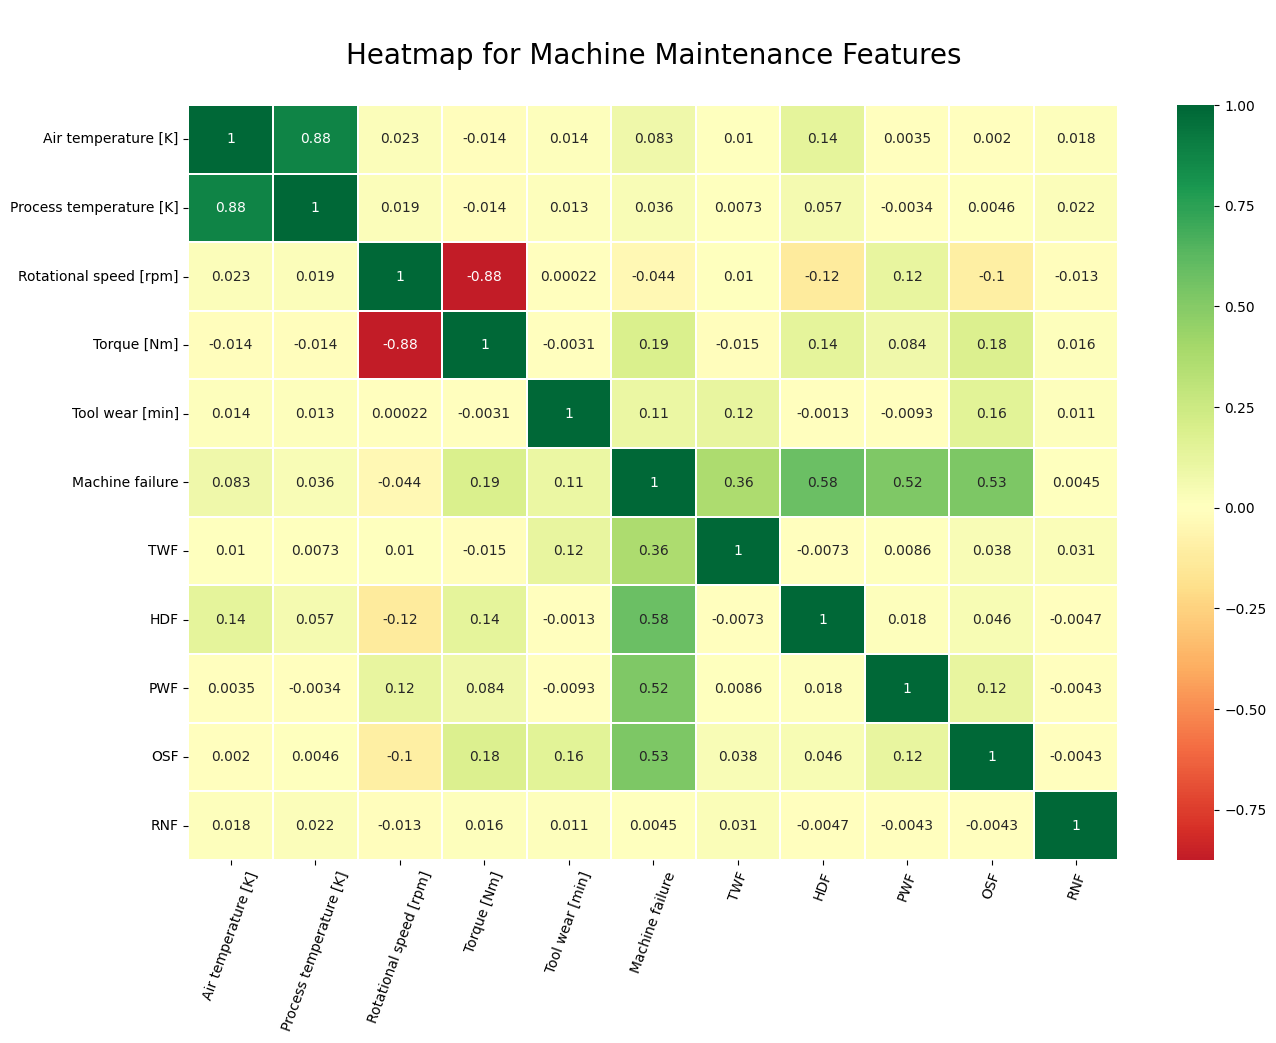

In [18]:
plt.figure(figsize=(15,10), dpi= 100)
sns.heatmap(processed_data.corr(), xticklabels=processed_data.corr().columns, yticklabels=processed_data.corr().columns, cmap='RdYlGn', center=0, linewidths=0.2, annot=True)

plt.title('\nHeatmap for Machine Maintenance Features\n', fontsize=20)
plt.xticks(fontsize=10,rotation=70)
plt.yticks(fontsize=10)
plt.show()

From the graph, it is seeen that Air tempreature is highly correlated with Process temperature, which is sensible since the higher a process temperature goes, the higher the air temperature will be. Additionally, it is seen that torque and rotational speed are inversely proportional. There are no significant correlations between the input features and the output.

# Data Preprocessing

For the purpose of the analysis and since normal machine learning models and classifiers work by determining the output through how closely it lies to the features without getting affected by the distance between the outputs. It is possible to group the machine failures into one column for multiclass classification. The success instance will be indicated by 0, 'TWF', 'HDF', 'PWF', 'OSF', 'RNF' will be indicated by 1, 2, 3, 4, and 5 respectively.

In [19]:
processed_data_grouped = processed_data.copy()

In [20]:
processed_data_grouped['Machine failure']=0
processed_data_grouped['Machine failure'][processed_data_grouped['TWF']==1]=1
processed_data_grouped['Machine failure'][processed_data_grouped['HDF']==1]=2
processed_data_grouped['Machine failure'][processed_data_grouped['PWF']==1]=3
processed_data_grouped['Machine failure'][processed_data_grouped['OSF']==1]=4
processed_data_grouped['Machine failure'][processed_data_grouped['RNF']==1]=5

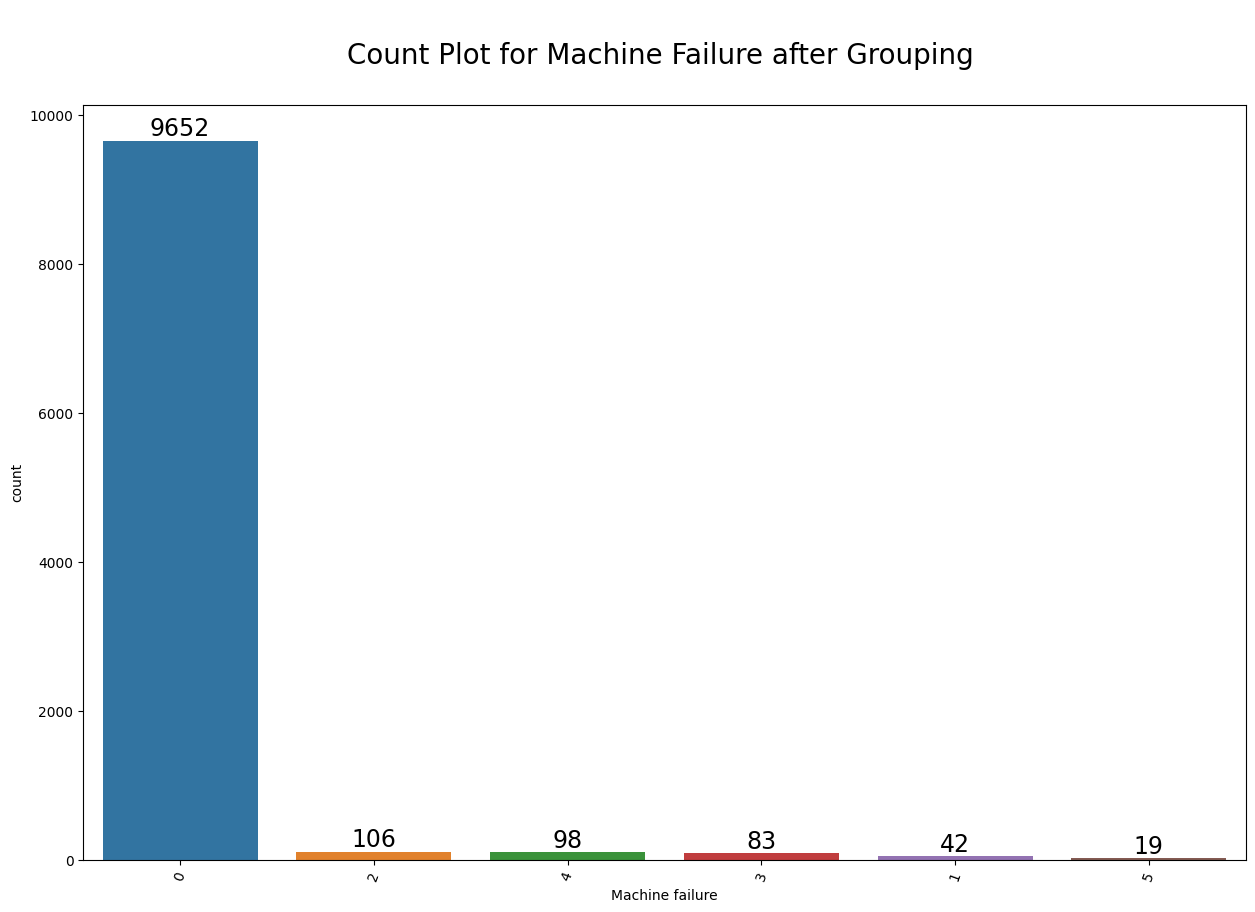

In [21]:
plt.figure(figsize=(15,10), dpi= 100)

ax = sns.countplot(processed_data_grouped['Machine failure'],order=pd.value_counts(processed_data_grouped['Machine failure']).index)
ax.bar_label(ax.containers[0], fontsize=17)
plt.title('\nCount Plot for Machine Failure after Grouping \n', fontsize=20)
plt.xticks(fontsize=10,rotation=70)
plt.yticks(fontsize=10)
plt.show()

The graph shows the failures and helps in understing them better. However, it should be noted that the number of successes has decreased, perhaps due to some mislabelling in the dataset for the failures. Let's take a look at the mislabelliing further.

In [22]:
mislabelled = processed_data.loc[(processed_data['Machine failure'] == 0) & ((processed_data['TWF'] + processed_data['HDF'] + processed_data['PWF'] + processed_data['OSF'] + processed_data['RNF']) > 0)]

In [23]:
mislabelled.head(19)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


In [25]:
mislabelled.shape

(19, 11)

It can be seen that the mislabelled data is mostly composed of RNF failures and since they compose a very small number of the dataset, they can be removed. Therefore, the grouping can be redefined as follows.

In [26]:
processed_data_grouped = processed_data.copy()

processed_data_grouped['Machine failure']=0
processed_data_grouped['Machine failure'][processed_data_grouped['TWF']==1]=1
processed_data_grouped['Machine failure'][processed_data_grouped['HDF']==1]=2
processed_data_grouped['Machine failure'][processed_data_grouped['PWF']==1]=3
processed_data_grouped['Machine failure'][processed_data_grouped['OSF']==1]=4

The columns can be dropped. Let's take a look at the correlation one more time to see if any interesting details have appeared.

In [27]:
processed_data_grouped.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1, inplace=True)

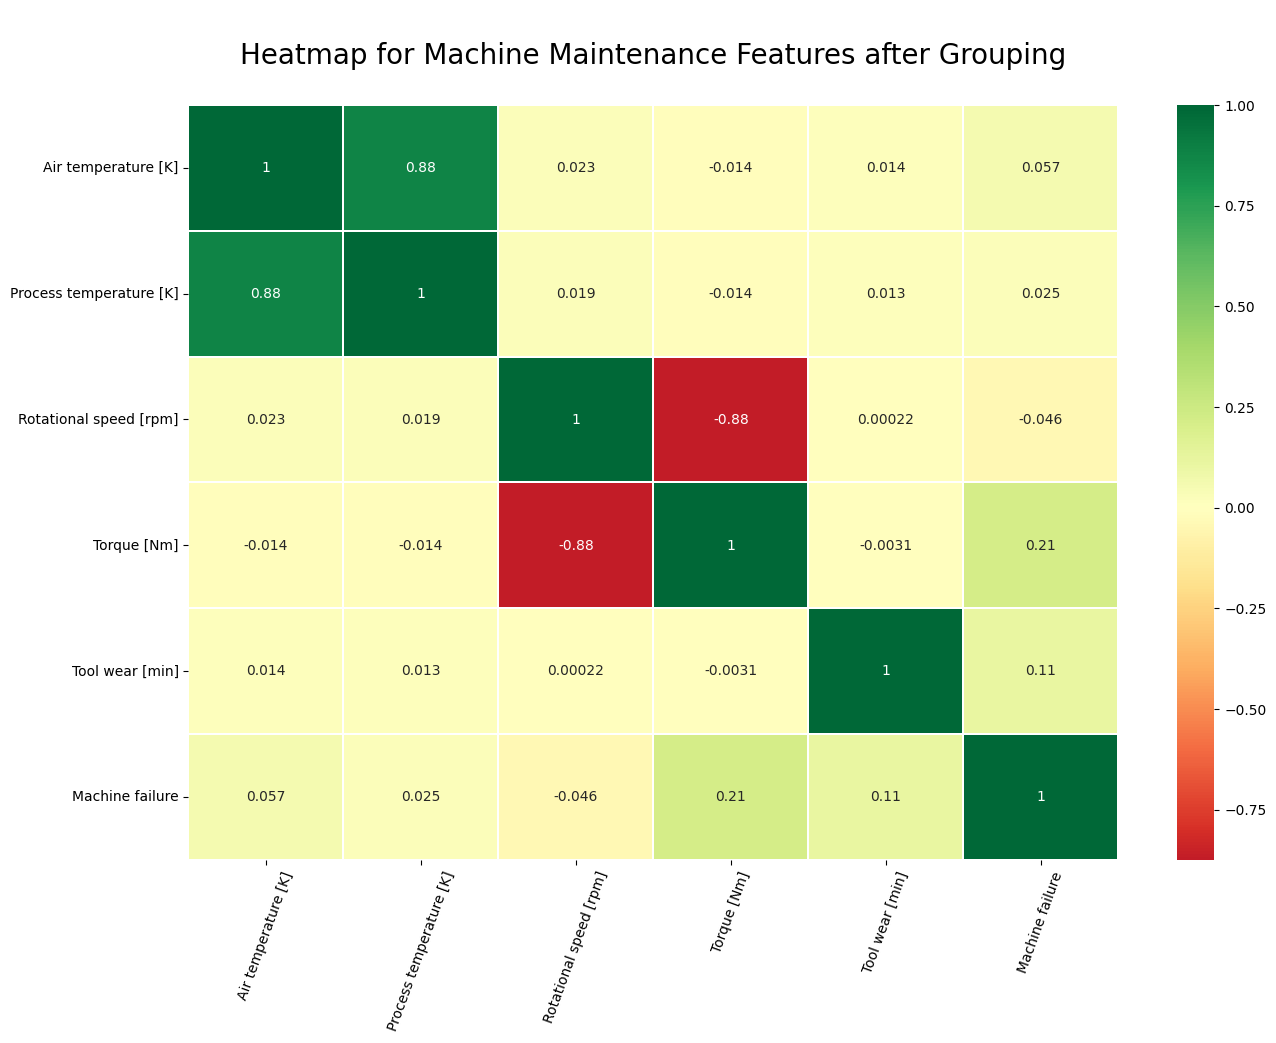

In [28]:
plt.figure(figsize=(15,10), dpi= 100)
sns.heatmap(processed_data_grouped.corr(), xticklabels=processed_data_grouped.corr().columns, yticklabels=processed_data_grouped.corr().columns, cmap='RdYlGn', center=0, linewidths=0.2, annot=True)

plt.title('\nHeatmap for Machine Maintenance Features after Grouping\n', fontsize=20)
plt.xticks(fontsize=10,rotation=70)
plt.yticks(fontsize=10)
plt.show()

Again, there are no significant correlations between the input features and the output.

This project will consider comparisons between the applied models by using base data without any scaling, then using another version of the data with feature scaling applied, and finally an data version with feature scaling and oversampling applied. This will help draw iinsight as to how these modifications affect the accuracy of the results.

## Base: Defining the Dependent and Independent Variables

In [29]:
X=processed_data_grouped.iloc[:,:-1].values
y=processed_data_grouped.iloc[:,-1].values

In [30]:
print(X)

[[ 298.1  308.6 1551.    42.8    0. ]
 [ 298.2  308.7 1408.    46.3    3. ]
 [ 298.1  308.5 1498.    49.4    5. ]
 ...
 [ 299.   308.6 1645.    33.4   22. ]
 [ 299.   308.7 1408.    48.5   25. ]
 [ 299.   308.7 1500.    40.2   30. ]]


In [31]:
print(y)

[0 0 0 ... 0 0 0]


## Base: Splitting the Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# Scaled: Defining the Dependent and Independent Variables



In [33]:
scaled_df=processed_data_grouped.copy() 

In [34]:
X_scaled=processed_data_grouped.iloc[:,:-1].values
y_scaled=processed_data_grouped.iloc[:,-1].values

## Scaled: Splitting the Data

In [35]:
X_scaled_train , X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,y_scaled,test_size=0.20,random_state=0)

## Scaling the Data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_scaled_train)
X_scaled_test = sc.transform(X_scaled_test)

In [37]:
print(X_scaled_train)

[[-0.09509118  0.40612254  0.93821897 -0.74940818  0.26299762]
 [-0.89093729 -0.8664902   0.36891261 -1.06077593 -0.94382689]
 [ 0.2530915  -0.1297144   0.06193369 -0.25724626  0.63915072]
 ...
 [ 0.65101456  0.07122445 -0.46830262  0.41570984  1.26607254]
 [-0.84119691 -0.59857173 -0.65807141  0.74716583 -1.16324953]
 [-0.14483156 -0.53159211 -1.07667902  1.75157792  0.48242026]]


In [38]:
print(X_scaled_test)

[[-1.1396392  -1.2013883  -1.14365624  1.3096366   0.76453508]
 [-2.18418723 -2.54098066 -0.51853553  0.99826885  0.40405503]
 [-0.39353347 -1.00044944 -0.2729524   0.32531275  0.79588118]
 ...
 [-0.19457194  0.74102063  0.61449575 -0.61883461  0.40405503]
 [-0.19457194 -0.66555135 -0.07760218  0.28513627  0.82722727]
 [ 0.84997609  0.67404102 -1.09342333  0.92796001 -1.28863389]]


# Oversampled and Scaled: Defining the Dependent and Independent Variables


In [39]:
oversampled_scaled_df=processed_data_grouped.copy() 

In [40]:
X_oversampled_scaled=processed_data_grouped.iloc[:,:-1].values
y_oversampled_scaled=processed_data_grouped.iloc[:,-1].values

## Oversampled and Scaled: Splitting the Data

In [41]:
X_oversampled_scaled_train , X_oversampled_scaled_test, y_oversampled_scaled_train, y_oversampled_scaled_test = train_test_split(X_oversampled_scaled,y_oversampled_scaled,test_size=0.20,random_state=0)

The data was oversampled with the failure (1 to 4) results yeilding to 9670 so that the data is balanced between failing or succeeding.

In [42]:
from imblearn.over_sampling import SMOTE
strategy = {0:9670, 1:2418, 2:2417, 3:2418, 4:2417} 
oversample = SMOTE(sampling_strategy=strategy)
X_oversampled_scaled_train, y_oversampled_scaled_train = oversample.fit_resample(X_oversampled_scaled_train, y_oversampled_scaled_train)

In [43]:
X_oversampled_scaled_train = sc.fit_transform(X_oversampled_scaled_train)
X_oversampled_scaled_test = sc.transform(X_oversampled_scaled_test)

# Modelling and Evaluation

In [73]:
model_eval_metrics = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','AUC score'])

## Random Forest

### Base Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5, max_features="sqrt", random_state=0) 
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=10, random_state=0)

In [75]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9745

In [76]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9767    0.9979    0.9872      1930
           1     0.0000    0.0000    0.0000         9
           2     0.8182    0.4500    0.5806        20
           3     0.8333    0.5556    0.6667        18
           4     0.8000    0.1739    0.2857        23

    accuracy                         0.9745      2000
   macro avg     0.6856    0.4355    0.5040      2000
weighted avg     0.9674    0.9745    0.9677      2000



As evident, the base model yields very high accuracy. However, as expected, the recall is very low for the failures and the precision reaches 0 for some of the failures due to the imbalance in the data.

In [77]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Base-Random-Forest'] = [accuracy, recall, precision, f1_sc, auc]

### Scaled Model

In [78]:
classifier.fit(X_scaled_train,y_scaled_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=10, random_state=0)

In [79]:
y_scaled_pred = classifier.predict(X_scaled_test)

In [80]:
print(classification_report(y_scaled_test,y_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9767    0.9979    0.9872      1930
           1     0.0000    0.0000    0.0000         9
           2     0.8182    0.4500    0.5806        20
           3     0.8333    0.5556    0.6667        18
           4     0.8000    0.1739    0.2857        23

    accuracy                         0.9745      2000
   macro avg     0.6856    0.4355    0.5040      2000
weighted avg     0.9674    0.9745    0.9677      2000



In [81]:
accuracy = accuracy_score(y_scaled_test,y_scaled_pred)
recall = recall_score(y_scaled_test,y_scaled_pred, average='weighted')
precision = precision_score(y_scaled_test,y_scaled_pred, average='weighted')
f1_sc = f1_score(y_scaled_test,y_scaled_pred, average='weighted')

auc = roc_auc_score(y_scaled_test, classifier.predict_proba(X_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Scaled-Random-Forest'] = [accuracy, recall, precision, f1_sc, auc]

### Oversampled and Scaled Model

In [82]:
classifier.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=10, random_state=0)

In [83]:
y_oversampled_scaled_pred = classifier.predict(X_oversampled_scaled_test)

In [84]:
print(classification_report(y_oversampled_scaled_test,y_oversampled_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9960    0.9124    0.9524      1930
           1     0.0571    0.6667    0.1053         9
           2     0.4390    0.9000    0.5902        20
           3     0.5714    0.8889    0.6957        18
           4     0.3793    0.9565    0.5432        23

    accuracy                         0.9115      2000
   macro avg     0.4886    0.8649    0.5773      2000
weighted avg     0.9753    0.9115    0.9380      2000



In [85]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Oversampled-Random-Forest'] = [accuracy, recall, precision, f1_sc, auc]

In [86]:
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators' : [30,50,60,70,80],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [6,8,10,20],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]}

gs=GridSearchCV(estimator= RandomForestClassifier(), param_grid=grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=5)
gs.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

best_accuracy=gs.best_score_
best_parameters=gs.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Accuracy: 0.9895036194415718
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 60, 'random_state': 0}


In [87]:
classifier=RandomForestClassifier(n_estimators=60, criterion='entropy', max_depth=20, max_features="sqrt", random_state=0) 
classifier.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=60, random_state=0)

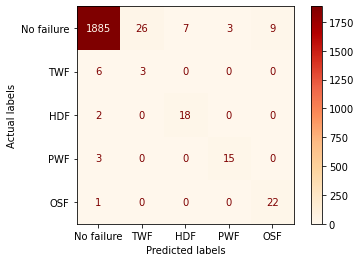

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the X_test
y_oversampled_scaled_pred=classifier.predict(X_oversampled_scaled_test)

# Create the confusion matrix
cm = confusion_matrix(y_oversampled_scaled_test,y_oversampled_scaled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["No failure","TWF", "HDF", "PWF", "OSF"])
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

In [89]:
print(classification_report(y_oversampled_scaled_test,y_oversampled_scaled_pred, digits=4))
# Plotting the ROC curve and calculating the AUC
# get false and true positive rates
y_oversampled_scaled_pred_prob=classifier.predict_proba(X_oversampled_scaled_test)
auc_score = roc_auc_score(y_oversampled_scaled_test,y_oversampled_scaled_pred_prob, multi_class ="ovo")
print("AUC: ", auc_score)

              precision    recall  f1-score   support

           0     0.9937    0.9767    0.9851      1930
           1     0.1034    0.3333    0.1579         9
           2     0.7200    0.9000    0.8000        20
           3     0.8333    0.8333    0.8333        18
           4     0.7097    0.9565    0.8148        23

    accuracy                         0.9715      2000
   macro avg     0.6720    0.8000    0.7182      2000
weighted avg     0.9822    0.9715    0.9762      2000

AUC:  0.9541164269980726


In [90]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['GS-Oversampled-Random-Forest'] = [accuracy, recall, precision, f1_sc, auc]
model_eval_metrics.head()

,Accuracy,Recall,Precision,F1-Score,AUC score
Base-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.981142
Scaled-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.981670
Oversampled-Random-Forest,0.9115,0.9115,0.975332,0.937956,0.978800
GS-Oversampled-Random-Forest,0.9715,0.9715,0.982222,0.976208,0.953226


## Logistic Regression

### Base Model

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [92]:
y_pred = lr_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9655

In [93]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9721    0.9938    0.9828      1930
           1     0.0000    0.0000    0.0000         9
           2     0.0000    0.0000    0.0000        20
           3     0.6667    0.1111    0.1905        18
           4     0.5238    0.4783    0.5000        23

    accuracy                         0.9655      2000
   macro avg     0.4325    0.3166    0.3347      2000
weighted avg     0.9501    0.9655    0.9559      2000



In [94]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Base-Logistric-Reg'] = [accuracy, recall, precision, f1_sc, auc]

### Scaled

In [95]:
lr_model.fit(X_scaled_train,y_scaled_train)

LogisticRegression(random_state=0)

In [96]:
y_scaled_pred = lr_model.predict(X_scaled_test)

In [97]:
print(classification_report(y_scaled_test,y_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9796    0.9959    0.9877      1930
           1     0.0000    0.0000    0.0000         9
           2     0.8571    0.3000    0.4444        20
           3     0.8333    0.5556    0.6667        18
           4     0.6316    0.5217    0.5714        23

    accuracy                         0.9750      2000
   macro avg     0.6603    0.4746    0.5340      2000
weighted avg     0.9687    0.9750    0.9701      2000



In [98]:
accuracy = accuracy_score(y_scaled_test,y_scaled_pred)
recall = recall_score(y_scaled_test,y_scaled_pred, average='weighted')
precision = precision_score(y_scaled_test,y_scaled_pred, average='weighted')
f1_sc = f1_score(y_scaled_test,y_scaled_pred, average='weighted')

auc = roc_auc_score(y_scaled_test, classifier.predict_proba(X_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Scaled-Logistic-Reg'] = [accuracy, recall, precision, f1_sc, auc]

### Oversampled and Scaled

In [99]:
lr_model.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

LogisticRegression(random_state=0)

In [100]:
y_oversampled_scaled_pred = lr_model.predict(X_oversampled_scaled_test)

In [101]:
print(classification_report(y_oversampled_scaled_test,y_oversampled_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9989    0.9254    0.9607      1930
           1     0.0824    0.7778    0.1489         9
           2     0.3571    1.0000    0.5263        20
           3     0.5312    0.9444    0.6800        18
           4     0.5897    1.0000    0.7419        23

    accuracy                         0.9265      2000
   macro avg     0.5119    0.9295    0.6116      2000
weighted avg     0.9794    0.9265    0.9477      2000



In [102]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Oversampled-Logistic-Reg'] = [accuracy, recall, precision, f1_sc, auc]

In [103]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[1000]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 10.0, 'max_iter': 1000, 'penalty': 'l2'}
accuracy : 0.946277145811789


In [104]:
lr_model= LogisticRegression(C = 10.0, penalty = 'l2', max_iter=1000, random_state=0)
lr_model.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

LogisticRegression(C=10.0, max_iter=1000, random_state=0)

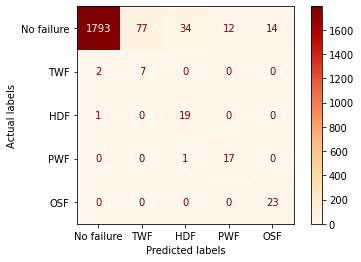

In [105]:
y_oversampled_scaled_pred=lr_model.predict(X_oversampled_scaled_test)

# Create the confusion matrix
cm = confusion_matrix(y_oversampled_scaled_test, y_oversampled_scaled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["No failure","TWF", "HDF", "PWF", "OSF"])
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

In [106]:
print(classification_report(y_oversampled_scaled_test, y_oversampled_scaled_pred, digits=4))
# Plotting the ROC curve and calculating the AUC
# get false and true positive rates
y_oversampled_scaled_pred_prob=classifier.predict_proba(X_oversampled_scaled_test)
auc_score = roc_auc_score(y_oversampled_scaled_test, y_oversampled_scaled_pred_prob, multi_class ="ovo")
print("AUC: ", auc_score)

              precision    recall  f1-score   support

           0     0.9983    0.9290    0.9624      1930
           1     0.0833    0.7778    0.1505         9
           2     0.3519    0.9500    0.5135        20
           3     0.5862    0.9444    0.7234        18
           4     0.6216    1.0000    0.7667        23

    accuracy                         0.9295      2000
   macro avg     0.5283    0.9202    0.6233      2000
weighted avg     0.9797    0.9295    0.9499      2000

AUC:  0.9541164269980726


In [107]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['GS-Oversampled-Logistic-Reg'] = [accuracy, recall, precision, f1_sc, auc]
model_eval_metrics.tail(-4)

,Accuracy,Recall,Precision,F1-Score,AUC score
Base-Logistric-Reg,0.9655,0.9655,0.950123,0.955899,0.505267
Scaled-Logistic-Reg,0.9750,0.9750,0.968661,0.970115,0.917268
Oversampled-Logistic-Reg,0.9265,0.9265,0.979426,0.947692,0.953226
GS-Oversampled-Logistic-Reg,0.9295,0.9295,0.979706,0.949881,0.953226


## KNN

### Base Model

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.967

In [110]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9726    0.9938    0.9831      1930
           1     0.0000    0.0000    0.0000         9
           2     0.0000    0.0000    0.0000        20
           3     0.7500    0.3333    0.4615        18
           4     0.7692    0.4348    0.5556        23

    accuracy                         0.9670      2000
   macro avg     0.4984    0.3524    0.4000      2000
weighted avg     0.9542    0.9670    0.9592      2000



In [111]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Base-KNN'] = [accuracy, recall, precision, f1_sc, auc]

### Scaled

In [112]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
y_scaled_pred = knn.predict(X_scaled_test)

In [114]:
print(classification_report(y_scaled_test,y_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9775    0.9917    0.9846      1930
           1     0.0000    0.0000    0.0000         9
           2     0.4286    0.3000    0.3529        20
           3     0.7500    0.3333    0.4615        18
           4     0.6500    0.5652    0.6047        23

    accuracy                         0.9695      2000
   macro avg     0.5612    0.4381    0.4807      2000
weighted avg     0.9618    0.9695    0.9647      2000



In [115]:
accuracy = accuracy_score(y_scaled_test,y_scaled_pred)
recall = recall_score(y_scaled_test,y_scaled_pred, average='weighted')
precision = precision_score(y_scaled_test,y_scaled_pred, average='weighted')
f1_sc = f1_score(y_scaled_test,y_scaled_pred, average='weighted')

auc = roc_auc_score(y_scaled_test, classifier.predict_proba(X_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Scaled-KNN'] = [accuracy, recall, precision, f1_sc, auc]

### Oversampled and Scaled

In [116]:
knn.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

KNeighborsClassifier(n_neighbors=3)

In [117]:
y_oversampled_scaled_pred = knn.predict(X_oversampled_scaled_test)

In [118]:
print(classification_report(y_oversampled_scaled_test,y_oversampled_scaled_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9956    0.9487    0.9716      1930
           1     0.0962    0.5556    0.1639         9
           2     0.4762    1.0000    0.6452        20
           3     0.5600    0.7778    0.6512        18
           4     0.5238    0.9565    0.6769        23

    accuracy                         0.9460      2000
   macro avg     0.5304    0.8477    0.6218      2000
weighted avg     0.9771    0.9460    0.9584      2000



In [119]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['Oversampled-KNN'] = [accuracy, recall, precision, f1_sc, auc]

In [120]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn_classifier = KNeighborsClassifier()  

grid = GridSearchCV(knn_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=5)

knn_grid = grid.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

print("tuned hyperparameters :(best parameters) ",knn_grid.best_params_)
print("accuracy :",knn_grid.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.978 total time=   0.1s
[CV 2/10] END ....................n_neighbors=1;, score=0.982 total time=   0.1s
[CV 3/10] END ....................n_neighbors=1;, score=0.988 total time=   0.1s
[CV 4/10] END ....................n_neighbors=1;, score=0.981 total time=   0.1s
[CV 5/10] END ....................n_neighbors=1;, score=0.983 total time=   0.1s
[CV 6/10] END ....................n_neighbors=1;, score=0.986 total time=   0.1s
[CV 7/10] END ....................n_neighbors=1;, score=0.977 total time=   0.1s
[CV 8/10] END ....................n_neighbors=1;, score=0.988 total time=   0.1s
[CV 9/10] END ....................n_neighbors=1;, score=0.987 total time=   0.1s
[CV 10/10] END ...................n_neighbors=1;, score=0.986 total time=   0.1s
[CV 1/10] END ....................n_neighbors=2;, score=0.979 total time=   0.1s
[CV 2/10] END ....................n_neighbors=

In [121]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_oversampled_scaled_train,y_oversampled_scaled_train)

KNeighborsClassifier(n_neighbors=1)

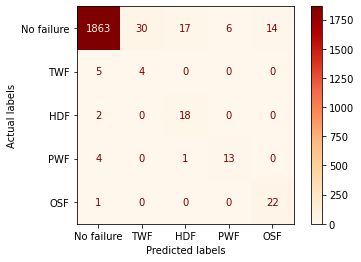

In [122]:
y_oversampled_scaled_pred=knn_model.predict(X_oversampled_scaled_test)

# Create the confusion matrix
cm = confusion_matrix(y_oversampled_scaled_test, y_oversampled_scaled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["No failure","TWF", "HDF", "PWF", "OSF"])
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

In [123]:
print(classification_report(y_oversampled_scaled_test, y_oversampled_scaled_pred, digits=4))
# Plotting the ROC curve and calculating the AUC
# get false and true positive rates
y_oversampled_scaled_pred_prob=classifier.predict_proba(X_oversampled_scaled_test)
auc_score = roc_auc_score(y_oversampled_scaled_test, y_oversampled_scaled_pred_prob, multi_class ="ovo")
print("AUC: ", auc_score)

              precision    recall  f1-score   support

           0     0.9936    0.9653    0.9792      1930
           1     0.1176    0.4444    0.1860         9
           2     0.5000    0.9000    0.6429        20
           3     0.6842    0.7222    0.7027        18
           4     0.6111    0.9565    0.7458        23

    accuracy                         0.9600      2000
   macro avg     0.5813    0.7977    0.6513      2000
weighted avg     0.9775    0.9600    0.9671      2000

AUC:  0.9541164269980726


In [124]:
accuracy = accuracy_score(y_oversampled_scaled_test,y_oversampled_scaled_pred)
recall = recall_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
precision = precision_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')
f1_sc = f1_score(y_oversampled_scaled_test,y_oversampled_scaled_pred, average='weighted')

auc = roc_auc_score(y_oversampled_scaled_test, classifier.predict_proba(X_oversampled_scaled_test), multi_class ="ovo", average='weighted')
model_eval_metrics.loc['GS-Oversampled-KNN'] = [accuracy, recall, precision, f1_sc, auc]
model_eval_metrics.tail(-8)

,Accuracy,Recall,Precision,F1-Score,AUC score
Base-KNN,0.9670,0.9670,0.954171,0.959220,0.505267
Scaled-KNN,0.9695,0.9695,0.961825,0.964745,0.917268
Oversampled-KNN,0.9460,0.9460,0.977060,0.958439,0.953226
GS-Oversampled-KNN,0.9600,0.9600,0.977539,0.967131,0.953226


In [125]:
model_eval_metrics

,Accuracy,Recall,Precision,F1-Score,AUC score
Base-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.981142
Scaled-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.981670
Oversampled-Random-Forest,0.9115,0.9115,0.975332,0.937956,0.978800
GS-Oversampled-Random-Forest,0.9715,0.9715,0.982222,0.976208,0.953226
Base-Logistric-Reg,0.9655,0.9655,0.950123,0.955899,0.505267
Scaled-Logistic-Reg,0.9750,0.9750,0.968661,0.970115,0.917268
Oversampled-Logistic-Reg,0.9265,0.9265,0.979426,0.947692,0.953226
GS-Oversampled-Logistic-Reg,0.9295,0.9295,0.979706,0.949881,0.953226
Base-KNN,0.9670,0.9670,0.954171,0.959220,0.505267
Scaled-KNN,0.9695,0.9695,0.961825,0.964745,0.917268


## ANN

### Preprocessing

Since neural networks are built on the comparisions between the features with the output data in mind, the approach to label the failure categories from 1 to 4 will affect the performance of the model greatly. As a result, the failure modes need to be provided in one-hot encoding form. The grouped dataset can be encoded to be used with ANN.

In [129]:
processed_data_grouped = pd.get_dummies(processed_data_grouped, columns=["Machine failure"])

In [130]:
processed_data_grouped.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure_0,Machine failure_1,Machine failure_2,Machine failure_3,Machine failure_4
0,298.1,308.6,1551,42.8,0,1,0,0,0,0
1,298.2,308.7,1408,46.3,3,1,0,0,0,0
2,298.1,308.5,1498,49.4,5,1,0,0,0,0
3,298.2,308.6,1433,39.5,7,1,0,0,0,0
4,298.2,308.7,1408,40.0,9,1,0,0,0,0


Renaming for easier understanding

In [131]:
processed_data_grouped.rename(columns = {'Machine failure_0': 'Machine Success', 'Machine failure_1': 'TWF', 'Machine failure_2': 'HDF', 'Machine failure_3': 'PWF', 'Machine failure_4': 'OSF'}, inplace = True)

In [132]:
processed_data_grouped.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Success,TWF,HDF,PWF,OSF
0,298.1,308.6,1551,42.8,0,1,0,0,0,0
1,298.2,308.7,1408,46.3,3,1,0,0,0,0
2,298.1,308.5,1498,49.4,5,1,0,0,0,0
3,298.2,308.6,1433,39.5,7,1,0,0,0,0
4,298.2,308.7,1408,40.0,9,1,0,0,0,0


In [133]:
NN_X=processed_data_grouped.iloc[:,:5].values
NN_y=processed_data_grouped.iloc[:,5:].values

In [134]:
print(NN_X)

[[ 298.1  308.6 1551.    42.8    0. ]
 [ 298.2  308.7 1408.    46.3    3. ]
 [ 298.1  308.5 1498.    49.4    5. ]
 ...
 [ 299.   308.6 1645.    33.4   22. ]
 [ 299.   308.7 1408.    48.5   25. ]
 [ 299.   308.7 1500.    40.2   30. ]]


In [135]:
print(NN_y)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [136]:
NN_X_train , NN_X_test, NN_y_train, NN_y_test = train_test_split(NN_X,NN_y,test_size=0.20,random_state=0)

# Scaled: Defining the Dependent and Independent Variables



In [137]:
NN_scaled_df=processed_data_grouped.copy() 

In [138]:
NN_X_scaled=processed_data_grouped.iloc[:,:5].values
NN_y_scaled=processed_data_grouped.iloc[:,5:].values

## Scaled: Splitting the Data

In [139]:
NN_X_scaled_train , NN_X_scaled_test, NN_y_scaled_train, NN_y_scaled_test = train_test_split(NN_X_scaled,NN_y_scaled,test_size=0.20,random_state=0)

## Scaling the Data

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
NN_X_scaled_train = sc.fit_transform(NN_X_scaled_train)
NN_X_scaled_test = sc.transform(NN_X_scaled_test)

In [141]:
print(NN_X_scaled_train)

[[-0.09509118  0.40612254  0.93821897 -0.74940818  0.26299762]
 [-0.89093729 -0.8664902   0.36891261 -1.06077593 -0.94382689]
 [ 0.2530915  -0.1297144   0.06193369 -0.25724626  0.63915072]
 ...
 [ 0.65101456  0.07122445 -0.46830262  0.41570984  1.26607254]
 [-0.84119691 -0.59857173 -0.65807141  0.74716583 -1.16324953]
 [-0.14483156 -0.53159211 -1.07667902  1.75157792  0.48242026]]


In [142]:
print(NN_X_scaled_test)

[[-1.1396392  -1.2013883  -1.14365624  1.3096366   0.76453508]
 [-2.18418723 -2.54098066 -0.51853553  0.99826885  0.40405503]
 [-0.39353347 -1.00044944 -0.2729524   0.32531275  0.79588118]
 ...
 [-0.19457194  0.74102063  0.61449575 -0.61883461  0.40405503]
 [-0.19457194 -0.66555135 -0.07760218  0.28513627  0.82722727]
 [ 0.84997609  0.67404102 -1.09342333  0.92796001 -1.28863389]]


# Oversampled and Scaled: Defining the Dependent and Independent Variables


In [143]:
NN_oversampled_scaled_df=processed_data_grouped.copy() 

In [144]:
NN_X_oversampled_scaled=processed_data_grouped.iloc[:,:5].values
NN_y_oversampled_scaled=processed_data_grouped.iloc[:,5:].values

## Oversampled and Scaled: Splitting the Data

In [145]:
NN_X_oversampled_scaled_train , NN_X_oversampled_scaled_test, NN_y_oversampled_scaled_train, NN_y_oversampled_scaled_test = train_test_split(NN_X_oversampled_scaled,NN_y_oversampled_scaled,test_size=0.20,random_state=0)

The data was oversampled so that the data is balanced between failing or succeeding.

In [146]:
NN_oversample = SMOTE()
NN_X_oversampled_scaled_train, NN_y_oversampled_scaled_train = oversample.fit_resample(NN_X_oversampled_scaled_train, NN_y_oversampled_scaled_train)

In [147]:
NN_X_oversampled_scaled_train = sc.fit_transform(NN_X_oversampled_scaled_train)
NN_X_oversampled_scaled_test = sc.transform(NN_X_oversampled_scaled_test)

### Base

In [148]:
import tensorflow as tf
ann_model=tf.keras.models.Sequential()

In [149]:
ann_model.add(tf.keras.layers.Dense(units=100,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
ann_model.add(tf.keras.layers.Dropout(0.4))
ann_model.add(tf.keras.layers.Dense(units=50,activation="relu"))

In [150]:
ann_model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(NN_X_train, NN_y_train, epochs=60, batch_size=10, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accurracy', 'loss'], loc='upper left')

plt.show()

In [ ]:
# Predict the NN_X_test
NN_y_pred = ann_model.predict(NN_X_test)
NN_y_pred_arg=np.argmax(NN_y_pred, axis=1)
NN_y_test_arg=np.argmax(NN_y_test, axis=1)

In [ ]:
accuracy = accuracy_score(NN_y_test_arg, NN_y_pred_arg)
recall = recall_score(NN_y_test_arg, NN_y_pred_arg, average='weighted')
precision = precision_score(NN_y_test_arg, NN_y_pred_arg, average='weighted')
f1_sc = f1_score(NN_y_test_arg, NN_y_pred_arg, average='weighted')

auc = 'N/A'
model_eval_metrics.loc['Base-ANN'] = [accuracy, recall, precision, f1_sc, auc]

### Scaled

In [ ]:
history = ann_model.fit(NN_X_scaled_train, NN_y_scaled_train, epochs=60, batch_size=10, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accurracy', 'loss'], loc='upper left')

plt.show()

In [162]:
# Predict the NN_X_scaled_test
NN_y_scaled_pred = ann_model.predict(NN_X_scaled_test)
NN_y_scaled_pred_arg=np.argmax(NN_y_scaled_pred, axis=1)
NN_y_scaled_test_arg=np.argmax(NN_y_scaled_test, axis=1)

63/63 [==============================] - 0s 1ms/step


In [163]:
accuracy = accuracy_score(NN_y_scaled_test_arg, NN_y_scaled_pred_arg)
recall = recall_score(NN_y_scaled_test_arg, NN_y_scaled_pred_arg, average='weighted')
precision = precision_score(NN_y_scaled_test_arg, NN_y_scaled_pred_arg, average='weighted')
f1_sc = f1_score(NN_y_scaled_test_arg, NN_y_scaled_pred_arg, average='weighted')

auc = 'N/A'
model_eval_metrics.loc['Scaled-ANN'] = [accuracy, recall, precision, f1_sc, auc]

### Oversampled

In [164]:
history = ann_model.fit(NN_X_oversampled_scaled_train, NN_y_oversampled_scaled_train, epochs=60, batch_size=10, validation_split=0.2)

Epoch 1/60
1548/1548 [==============================] - 5s 3ms/step - loss: 0.9345 - accuracy: 0.6962 - val_loss: 4.1764 - val_accuracy: 0.0000e+00
Epoch 2/60
1548/1548 [==============================] - 3s 2ms/step - loss: 0.9014 - accuracy: 0.7048 - val_loss: 4.2628 - val_accuracy: 0.0000e+00
Epoch 3/60
1548/1548 [==============================] - 4s 2ms/step - loss: 0.9061 - accuracy: 0.7048 - val_loss: 4.2227 - val_accuracy: 0.0000e+00
Epoch 4/60
1548/1548 [==============================] - 4s 2ms/step - loss: 0.8914 - accuracy: 0.7104 - val_loss: 4.4187 - val_accuracy: 0.0000e+00
Epoch 5/60
1548/1548 [==============================] - 5s 3ms/step - loss: 0.9005 - accuracy: 0.7070 - val_loss: 4.3701 - val_accuracy: 0.0000e+00
Epoch 6/60
1548/1548 [==============================] - 7s 4ms/step - loss: 0.8884 - accuracy: 0.7123 - val_loss: 4.2428 - val_accuracy: 0.0000e+00
Epoch 7/60
1548/1548 [==============================] - 5s 3ms/step - loss: 0.8863 - accuracy: 0.7131 - val_loss

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accurracy', 'loss'], loc='upper left')

plt.show()

In [166]:
# Predict the NN_X_scaled_test
NN_y_oversampled_scaled_pred = ann_model.predict(NN_X_oversampled_scaled_test)
NN_y_oversampled_scaled_pred_arg=np.argmax(NN_y_oversampled_scaled_pred, axis=1)
NN_y_oversampled_scaled_test_arg=np.argmax(NN_y_oversampled_scaled_test, axis=1)

63/63 [==============================] - 0s 1ms/step


In [167]:
accuracy = accuracy_score(NN_y_oversampled_scaled_test_arg, NN_y_oversampled_scaled_pred_arg)
recall = recall_score(NN_y_oversampled_scaled_test_arg, NN_y_oversampled_scaled_pred_arg, average='weighted')
precision = precision_score(NN_y_oversampled_scaled_test_arg, NN_y_oversampled_scaled_pred_arg, average='weighted')
f1_sc = f1_score(NN_y_oversampled_scaled_test_arg, NN_y_scaled_pred_arg, average='weighted')

auc = 'N/A'
model_eval_metrics.loc['Oversampled-ANN'] = [accuracy, recall, precision, f1_sc, auc]

In [168]:
model_eval_metrics

,Accuracy,Recall,Precision,F1-Score,AUC score
Base-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.981142
Scaled-Random-Forest,0.9745,0.9745,0.967372,0.967727,0.98167
Oversampled-Random-Forest,0.9115,0.9115,0.975332,0.937956,0.9788
GS-Oversampled-Random-Forest,0.9715,0.9715,0.982222,0.976208,0.953226
Base-Logistric-Reg,0.9655,0.9655,0.950123,0.955899,0.505267
Scaled-Logistic-Reg,0.9750,0.9750,0.968661,0.970115,0.917268
Oversampled-Logistic-Reg,0.9265,0.9265,0.979426,0.947692,0.953226
GS-Oversampled-Logistic-Reg,0.9295,0.9295,0.979706,0.949881,0.953226
Base-KNN,0.9670,0.9670,0.954171,0.959220,0.505267
Scaled-KNN,0.9695,0.9695,0.961825,0.964745,0.917268


# Binary Classification

[Notebook](https://https://colab.research.google.com/drive/18nhgfCM3WeAXvrprNL5rRgkXVYH2Rudq?usp=sharing)